# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Finding out relations between different Religious bodies functioning in Ann Arbor, MI their Adherence, Traditonal and Family distributions among the population for 2010 Census

Region - **Ann Arbor, Michigan, United States**.

Topic -  **Various Religions and Traditions followed by the local population**

**The dataset I have ensembled is by web scrapping from the below listed resources :-**
* [Metro-Area Membership Report By ARDA](http://www.thearda.com/rcms2010/r/m/11460/rcms2010_11460_metro_name_2010.asp)
(Provides Data in Tabular form)
* [Association of Statisticians 
   of American Religious Bodies](http://www.asarb.org/)
* [U.S. Religion Census
1952 to 2010](http://www.usreligioncensus.org/)   

**So, I have used the dataset to find relations and visualisations for demographic data about religion in this region.**

# Summary

For this assignment, I have used three different kinds of visualisations that I found out through this database.

**First figure - **

* I have used a **Bar Plot** to find the number of different traditions followed by the people of Ann Arbor, MI.

**Second Figure - **

* I have used a **Line Plot** to find the number of different Religious Families the people of Ann Arbor, MI belong to.

**Third Figure - **

* I have used a **Swarm Plot** to find the relation between Adherents and Adherents Rate for the population of Ann Arbor, MI.

**Meaning of a Religious event**

A religious event is a time of special importance marked by adherents to that religion. Religious event are commonly celebrated on recurring cycles in a calendar year or lunar calendar. Hundreds of very different religious events are held around the world each year and a religious festival is about celebrating something that is special to that religion.

**Meaning of a Tradition**

A tradition is a belief or behavior passed down within a group or society with symbolic meaning or special significance with origins in the past

I believe the visualisations provided by me tells us about major trends among Religious Family and Traditions followed by the people of this region. Also, Adherence Rate and Adherents show the trend of curve among these values through which we get to know about the major religious mindset among the population.

I have used Cairo's principles of truthfulness, functionality, beauty, and insightfulness in the making of all of my visualisations.So, As to keep the data-ink ratio high and reduce plot junk.I have used minimalism and light weight colours to please the users.

# Facts about the Data for Ann Arbor, MI

The population of the Ann Arbor, MI, Metropolitan Statistical Area was **322,895** in 2000; in 1990 it was **282,937**. The total population changed **14.1%**. The adherent totals of the religious groups listed above (107,901) included **33.4%** of the total population in 2000.

Ann Arbor, MI, Metropolitan Statistical Area includes Washtenaw County, Michigan.

* Total number of Congregations in the data set are **206**
* Total number of Adherents in the data set are **107,901**
* People who did not clamied any religion or did not felt like they belonged to any religion i.e **Unclaimed** in the population were **231,595**

In [1]:
%matplotlib notebook
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import requests
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns

plt.rcParams.update({'font.size': 8,'font.family':'cursive'})
plt.style.use('seaborn-dark-palette')

page = requests.get('http://www.thearda.com/rcms2010/r/m/11460/rcms2010_11460_metro_name_2010.asp')
soup = BeautifulSoup(page.content, 'html.parser')
tr_tags = soup.find_all('tr')

full_ls = []
for index in range(7,81):
    node = tr_tags[index]
    td_child = node.find_all('td')
    ls = []
    for i in td_child:
        try:
            child = i.find_all('a')[0]
            ls.append(child.get_text())
        except:
            ls.append(i.get_text())
    full_ls.append(ls)
    
df = pd.DataFrame(full_ls,columns =  ['Religious Bodies','Tradition','Family','Congregations','Adherents','Adherence Rate'])
df.loc[df['Adherents'] == '---','Adherents'] = '0'
df.loc[df['Adherence Rate'] == '---','Adherence Rate'] = '0'

def num_conv(row):
    return int(row.replace(',',''))

df['Adherents'] = df['Adherents'].apply(num_conv)
df['Adherence Rate'] = df['Adherence Rate'].astype('float')
df['Congregations'] = df['Congregations'].astype('int')
df

,Religious Bodies,Tradition,Family,Congregations,Adherents,Adherence Rate
0,African Methodist Episcopal Church,Black Protestant,Methodist/Pietist,5,1399,4.1
1,American Baptist Churches in the USA,Mainline Protestant,Baptist,7,1770,5.1
2,Antiochian Orthodox Christian Archdiocese of N...,Orthodox,Eastern Liturgical (Orthodox),1,63,0.2
3,Armenian Church of North America (Catholicosat...,Orthodox,Eastern Liturgical (Orthodox),1,30,0.1
4,Assemblies of God,Evangelical Protestant,Pentecostal,13,1375,4.0
5,Bahá'í,Other,Other Groups,3,358,1.0
6,"Buddhism, Mahayana",Other,Other Groups,4,300,0.9
7,"Buddhism, Theravada",Other,Other Groups,3,295,0.9
8,"Buddhism, Vajrayana",Other,Other Groups,2,180,0.5
9,Calvary Chapel Fellowship Churches,Evangelical Protestant,Pentecostal,1,0,0.0


**Data filtering for finding relation among Population and the Traditions followed by them**


In [2]:
df1 = df.groupby('Tradition').sum()
df1

,Congregations,Adherents,Adherence Rate
Tradition,,,
Black Protestant,23,5374,15.6
Catholic,14,42603,123.6
Evangelical Protestant,122,25339,73.6
Mainline Protestant,66,25876,75.1
Orthodox,5,918,2.8
Other,43,13086,37.9


<IPython.core.display.Javascript object>


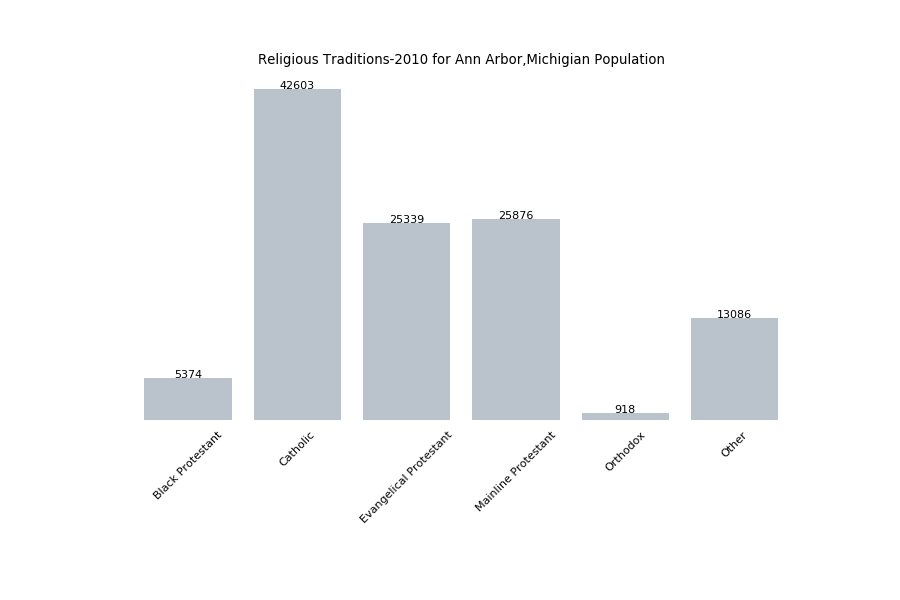

/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findf

In [8]:
y_pos = np.arange(len(df1))
plt.figure(figsize=(9,6))
bars = plt.bar(y_pos,df1['Adherents'],alpha=0.5,align='center',color='lightslategrey')
plt.xticks(y_pos,df1.index )
plt.subplots_adjust(bottom=0.3)
plt.title('Religious Traditions-2010 for Ann Arbor,Michigian Population')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
                 ha='center', fontsize=8)
    
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.savefig('1.png')

**Data filtering done for plotting the values of Number of Adherents belonging to different Religious Families**

In [4]:
df2 = df.groupby('Family').sum()
df2

,Congregations,Adherents,Adherence Rate
Family,,,
----,19,5418,15.7
Adventist,11,748,2.2
Baptist,33,6779,19.6
Catholicism,14,42603,123.6
Christian Science,1,0,0.0
Eastern Liturgical (Orthodox),5,918,2.8
Episcopalianism/Anglicanism,8,2264,6.6
European Free-Church,6,317,0.9
Holiness,17,2830,8.3


<IPython.core.display.Javascript object>


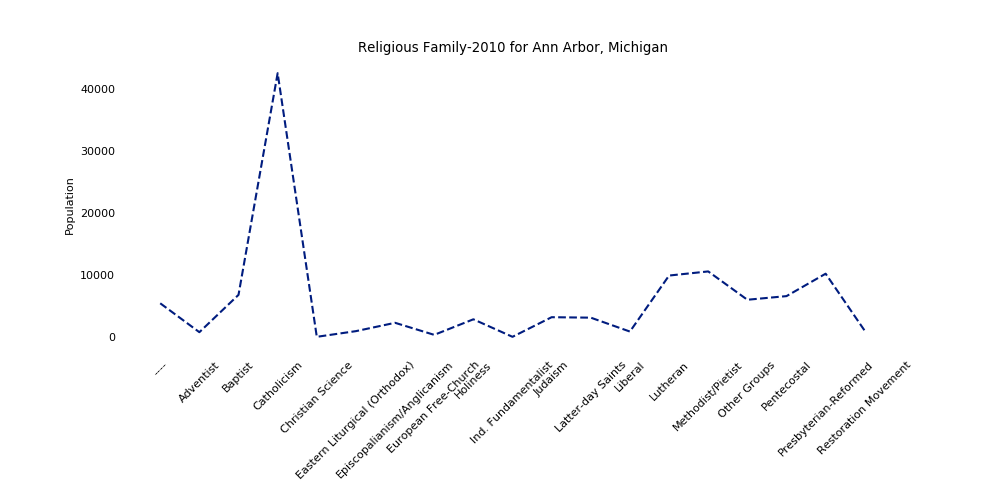

/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findf

/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findf

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df2['Adherents'],'--');
plt.subplots_adjust(bottom=0.3)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
plt.ylabel('Population')
plt.title('Religious Family-2010 for Ann Arbor, Michigan')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
 
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

plt.savefig('2.png')    

** For finding the relational curve between Adherence and Adherence Rate in Ann Arbor,MI**

<IPython.core.display.Javascript object>


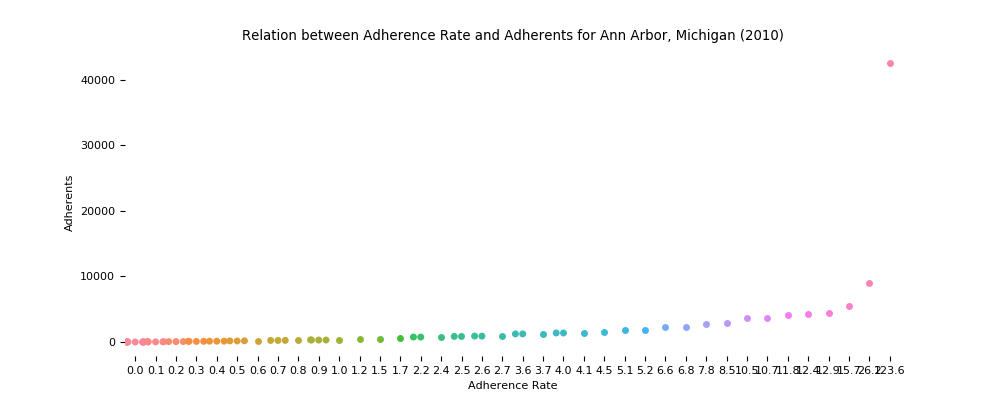

/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findf

/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findf

/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/kartikey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findf

In [12]:
plt.figure(figsize=(10,4))
plt.title('Relation between Adherence Rate and Adherents for Ann Arbor, Michigan (2010)')
sns.swarmplot('Adherence Rate','Adherents', data=df);

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.savefig('3.png')    